In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas_profiling as pdpf

# Part One | Question Based

### 1. Question:

Please refer the table below to answer below questions:
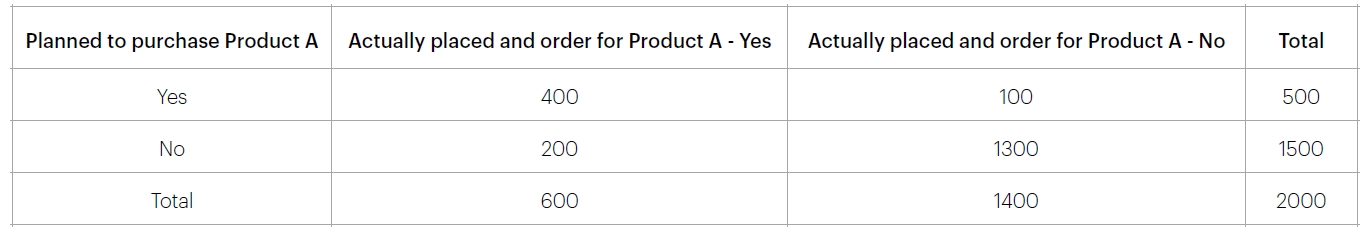
1. Refer to the above table and find the joint probability of the people who planned to purchase and actually
placed an order.
2. Refer to the above table and find the joint probability of the people who planned to purchase and actually
placed an order, given that people planned to purchase.

### 1. Answer:

##### Let us assume the following:

1) Joint Probability of the people who planned to purchase and actually placed an order = JP1

2) Joint Probability of the people who planned to purchase and actually placed an order, given that people planned to purchase = JP2

3) Probability of the people who planned to purchase = PA

4) Probability of the people who actually placed an order = PB

5) Probaility of the people who actually placed an order, given that people planned to purchase = PBGA

##### On refering to the table above, we get

PA = 500/2000

PB = 600/2000

PBGA = 400/500

##### Therefore,

1. JP1 = PA x PB = 0.075

2. JP2 = PA x PBGA = 0.2

In [2]:
PA, PB, PBGA = 500/2000, 600/2000, 400/500
JP1 = PA * PB
JP2 = PA * PBGA
print("Joint Probability of the people who planned to purchase and actually placed an order = "+ str(JP1))
print("Joint Probability of the people who planned to purchase and actually placed an order, given that people planned to purchase="+ str(JP2))

Joint Probability of the people who planned to purchase and actually placed an order = 0.075
Joint Probability of the people who planned to purchase and actually placed an order, given that people planned to purchase=0.2


### 2. Question:
An electrical manufacturing company conducts quality checks at specified periods on the
products it manufactures. Historically, the failure rate for the manufactured item is 5%. Suppose a random
sample of 10 manufactured items is selected. Answer the following questions.

A. Probability that none of the items are defective?

B. Probability that exactly one of the items is defective?

C. Probability that two or fewer of the items are defective?

D. Probability that three or more of the items are defective ?

### 2. Answer:
This is a binomial distribution problem.

$\large P(k) =$ $\large ^nC_k\,P^{k}(1-P)^{n-k}$

where, $^nC_k = \Large\frac{n!}{k!(n-k)!}$

$P$ in our case is the probability of the faliure rate for the manufactured items which is 5%

$P(k)$ is the probability of getting $k$ faliures for $10$ manufactured items, i.e. $k$ can take values $0, 1, 2, .... , 9, 10.$

For finding the value of $P(k)$ we can use the binomial probability mass function as given below in the next cell using **scipy.stats as stats**.

Calculation of $P(k)$ could also be acomplished by using **numpy as np** by simply calculating the values as mentioned below for every individual value of $k$ separately i.e. from $0$ to $10$.

nCk = np.math.factorial(n)/(np.math.factorial(k) * np.math.factorial(n-k))

pk = nCk * (p \** k) * ((1-p) \** (n-k))

where, "*" represents multiplication and "\**" represents raised to the power

The answers to the problem are calculated in the cell below sequentially.

In [27]:
n, p, k = 10, 0.05, np.arange(0,11)
binomial = stats.binom.pmf(k,n,p)

print("A. Probability that none of the items are defective = "+str(binomial[0]))
print("B. Probability that exactly one of the items is defective = "+str(binomial[1]))
print("C. Probability that two or fewer of the items are defective = "+str(sum(binomial[:3])))
print("D. Probability that three or more of the items are defective = "+str(1-sum(binomial[:3])))       # instead this can also be used after + : str(sum(binomial[3:])))

A. Probability that none of the items are defective = 0.5987369392383789
B. Probability that exactly one of the items is defective = 0.31512470486230504
C. Probability that two or fewer of the items are defective = 0.9884964426207035
D. Probability that three or more of the items are defective = 0.011503557379296536


### 3. Question:
A car salesman sells on an average 3 cars per week.

A. Probability that in a given week he will sell some cars.

B. Probability that in a given week he will sell 2 or more but less than 5 cars.

C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold perweek.

### 3. Answer:

This is a Poisson distribution problem.

$
P(x)=\Large\frac{e^{-\lambda}\,\lambda^x}{x!}
$

where, $P(x)$ is the probability of $x$ successes given an idea of $\lambda$

$\lambda =$ Average number of successes, which is $3$ for our case.

$e = 2.71828...$ (based on natural logarithm)

$x =$ Successes per unit which can take values $0,1,2,3,....,\infty.$

But for calculations we tend to take $x$ upto a number greater than $\lambda$ which is equal to $3$ in our case, i.e. $0,1,2,3,....,10.$

A. Probability that in a given week he will sell some cars = 0.950212931632136
B. Probability that in a given week he will sell 2 or more but less than 5 cars = 0.6161149710523164
C. Poisson distribution function for: 
   Cumulative Probability of cars sold per-week vs Number of cars sold per-week, is plotted below


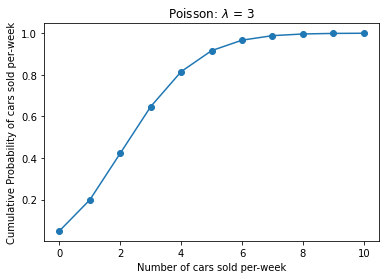

In [92]:
rate, n = 3, np.arange(0,11)  # rate, denoted with lambda in the formula for poisson distribution &
                              # n, denoted with x in the formula, is a numpy array of different no. of cars sold per-week ranging from 0 to 10 to construct a probability distribution.

poisson = stats.poisson.pmf(n,rate)   # Calculating the distribution and storing the distribution of probablitites in an array.



poiss=poisson.tolist()        # Convert poisson numpy array to list named poiss.
t=[]                          # Empty list for Cumulative Probability Distribution entries.
    
for i in range(1,12):
    t.append(sum(poiss[:i]))  # Appending the empty list with Cumulative Probabilities.
z=np.array(t)                 # Converting the list "t" back to numpy array "z", not necessary.



print("A. Probability that in a given week he will sell some cars = "+str(1-poisson[0]))
print("B. Probability that in a given week he will sell 2 or more but less than 5 cars = "+str(sum(poisson[2:5])))
print("C. Poisson distribution function for: \n   Cumulative Probability of cars sold per-week vs Number of cars sold per-week, is plotted below")

#visualising the enquired plot with pyplot
plt.plot(n,z,'o-')
plt.title('Poisson: $\lambda$ = %i ' % rate)
plt.xlabel('Number of cars sold per-week')
plt.ylabel('Cumulative Probability of cars sold per-week')
plt.show()

### 4. Question:

Accuracy in understanding orders for a speech based bot at a restaurant is important for the
Company X which has designed, marketed and launched the product for a contactless delivery due to the
COVID-19 pandemic. Recognition accuracy that measures the percentage of orders that are taken correctly is
86.8%. Suppose that you place order with the bot and two friends of yours independently place orders with
the same bot. Answer the following questions.

A. What is the probability that all three orders will be recognised correctly?

B. What is the probability that none of the three orders will be recognised correctly?

C. What is the probability that at least two of the three orders will be recognised correctly?

### 4. Answer:
This is a binomial distribution problem.

$\large P(k) =$ $\large ^nC_k\,P^{k}(1-P)^{n-k}$

where, $^nC_k = \Large\frac{n!}{k!(n-k)!}$

$P$ in our case is the recognition accuracy that measures the percentage of orders that are taken correctly which is $86.8\%$

$P(k)$ is the probability of getting $k$ successes in $3$ orders, i.e. $k$ can take values $0, 1, 2, 3.$

For finding the value of $P(k)$ we can use the binomial probability mass function as given below in the next cell using **scipy.stats as stats**.

Calculation of $P(k)$ could also be acomplished by using **numpy as np** by simply calculating the values as mentioned below for every individual value of $k$ separately i.e. from $0$ to $3$.

nCk = np.math.factorial(n)/(np.math.factorial(k) * np.math.factorial(n-k))

pk = nCk * (p \** k) * ((1-p) \** (n-k))

where, "*" represents multiplication and "\**" represents raised to the power

The answers to the problem are calculated in the cell below sequentially.

In [8]:
n1, p1, k1 = 3, 0.868, np.arange(0,4)    # Using the suffix "1" for every variable as they are already in use.
binomial1 = stats.binom.pmf(k1,n1,p1)

print("A. Probability that all three orders will be recognised correctly = "+str(binomial1[3]))
print("B. Probability that none of the three orders will be recognised correctly = "+str(binomial1[0]))
print("C. Probability that at least two of the three orders will be recognised correctly = "+str(sum(binomial1[2:])))

A. Probability that all three orders will be recognised correctly = 0.653972032
B. Probability that none of the three orders will be recognised correctly = 0.002299968
C. Probability that at least two of the three orders will be recognised correctly = 0.9523279359999999


### 5. Question:

A group of 300 professionals sat for a competitive exam. The results show the information of
marks obtained by them have a mean of 60 and a standard deviation of 12. The pattern of marks follows a
normal distribution. Answer the following questions.

A. What is the percentage of students who score more than 80.

B. What is the percentage of students who score less than 50.

C. What should be the distinction mark if the highest 10% of students are to be awarded distinction?

### 5. Answer:
For a normal distribution the z-score is calculated with the help of the mean value, the standard deviation and the given value about which the probability is to be determined.

Calculation of z-score:

$\Large z=\frac{x-\mu}{\sigma}$

where, $x$ is the given value about which the probability has to be calculated

$\mu$ is the mean and $\sigma$ is the standard deviation.

This can be done with the help of cumulative distribution function with or without calculating the z-score by using **scipy.stats as stats** in the manner given in the cell below.

In [4]:
mean, sd = 60, 12

print("A. Percentage of students who score more than 80 = "+str(100*(1-stats.norm.cdf(80,loc=mean,scale=sd))))
print("B. Percentage of students who score less than 50 = "+str(100*stats.norm.cdf(50,loc=mean,scale=sd)))
print("C. Distinction mark, if the highest 10% of students are to be awarded distinction = "+str(mean+(sd*stats.norm.ppf(1-10/100))))  #calculation of x given; mean(mew), standard deviation(sigma) and z-score for a value less than some intended value.
#to check the third command, run the command below it must return "10" percent
#print(100*(1-stats.norm.cdf(75.3786187865352,loc=mean,scale=sd)))

A. Percentage of students who score more than 80 = 4.77903522728147
B. Percentage of students who score less than 50 = 20.232838096364308
C. Distinction mark, if the highest 10% of students are to be awarded distinction = 75.3786187865352


### 6. Question:

Explain 1 real life industry scenario \[other than the ones mentioned above\] where you can use the
concepts learnt in this module of Applied statistics to get a data driven business solution.

### 6. Answer:
One real life scenario where one can use the concepts learnt in this module of Applied statistics to get a data driven business solution is that of what Elon's Neuralink is trying to achieve. Neuralink is trying to develop breakthrough technology for interfacing with the brain which involves implanting electrodes in a human/animal brain and connecting those individual, fine, hair like projections that emanate from the device to a set of neurons and read the impulses generated by them and make a good sense of what the brain wants to do. This process off-course must be a bit complex in reality inside the research and development labs of Neuralink but what I make of it after going through some concepts in applied statistics is that they must be using some fundamentally complex set of algorithms to map the impulses the brain is generating at a given point of time for some specific set of dendrites connected to the device but the key idea behind finding the patterns of the set of impulses generated must be based on some basic statistic problem like that of what we know as the Bionomial Distribution problem. What I am trying to suggest is that the real life problem of analyzing the patterns of the impulses for a specific set of thoughts or stimuli in the Neuro-Science Community is crucial in uderstanding how the brain works, which Neuralink is trying to achieve. I am citing one such example which the industry faces with the help of some uderlying statements.

A set of 1 Million Neurons in the Visual Cortex are connected to an animal's brain through the interface the company has developed and the data of which particular neural connections fire-up is collected for an event of the animal looking at a given picture of an apple and a banana. The individual probabilities of generating an impulse for every single neuron that is connected is recorded for many apples and bananas separately. If one talks about a particular set of neurons among those one million neurons that are connected to the interface, the probability of them generating an impulse simultaneously or sequentially on seeing a banana is 95%. Suppose a random sample of 100,000 neurons of that particular set is analyzed. What is the probability that 75,000 neurons will fire-up on seeing a banana of the same type.

This example is a good estimate so as to how a data driven analysis of understanding how the neuron's will fire-up on some stimuli is key to the company's business for developing safe and precise products which the medical industry needs. As for instance the Brain Interface can be used for giving a blind person the ability to see through a set of cameras and connecting the feed to the electrodes in the brain, wiring it in such a way that the human brain percieves the data as if originally transmitted by a sound human eye. This could only be accomplished once we map an individual's brain to the neural level which the company is trying to achieve with the help of statistics, probability AI & ML and essentially every single state of the art algorithm that humans think is close to the neuron which guides information through the brain.

# Part Two | Project Based

1. Read the data set, clean the data and prepare a final dataset to be used for analysis.
2. Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get a data driven insights on recommending which teams they can approach which will be a deal win for them. Also as a data and statistics expert you have to develop a detailed performance report using this data.
3. Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the data points collected by the association to perform a better data analysis in future.

In [3]:
data=pd.read_csv('DS - Part2 - Basketball.csv')

In [4]:
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [5]:
data.describe()

,Tournament,HighestPositionHeld
count,61.000000,61.000000
mean,24.000000,7.081967
std,26.827225,5.276663
min,1.000000,1.000000
25%,4.000000,3.000000
50%,12.000000,6.000000
75%,38.000000,10.000000
max,86.000000,20.000000


In [6]:
data.shape

(61, 13)

In [7]:
data.dtypes.value_counts()

object    11
int64      2
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [9]:
dupes = data.duplicated()       ###Identify duplicates records in the data
sum(dupes)

0

In [10]:
data.isnull().sum().sum()

0

In [11]:
data.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [12]:
# isdigit()? 
IsDigit = pd.DataFrame(data.TournamentChampion.str.isdigit())    # if the string is made of digits store True else False

#print isDigit = False!
data[IsDigit["TournamentChampion"] == False]   # from temp take only those rows where any column has false

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
6,Team 7,82,2792,2626,948,608,1070,3609,3889,-,-,1929,3
8,Team 9,58,2109,1986,698,522,766,2683,2847,-,1,1939-40,2
11,Team 12,51,1789,1698,586,389,723,2278,2624,-,-,1939-40,4
12,Team 13,42,1471,1466,463,384,619,1767,2180,-,-,1948-49,4
13,Team 14,44,1416,1428,453,336,639,1843,2368,-,1,1929,2
14,Team 15,43,1389,1458,471,358,629,1753,2152,-,1,1944_45,2
15,Team 16,37,1351,1318,426,327,565,1500,1834,-,-,1935-36,4
16,Team 17,36,1314,1255,390,330,535,1421,1763,-,-,1949_50,4
17,Team 18,38,1174,1192,408,292,492,1642,1951,-,-,1933to34,3
18,Team 19,27,1148,988,333,256,399,1182,1371,-,-,1960-61,3


In [13]:
# Missing values have a'-''
# Replace missing values with NaN
data = data.replace('-', np.nan)
data[IsDigit['TournamentChampion'] == False]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
6,Team 7,82,2792,2626,948,608,1070,3609,3889,NaN,NaN,1929,3
8,Team 9,58,2109,1986,698,522,766,2683,2847,NaN,1,1939-40,2
11,Team 12,51,1789,1698,586,389,723,2278,2624,NaN,NaN,1939-40,4
12,Team 13,42,1471,1466,463,384,619,1767,2180,NaN,NaN,1948-49,4
13,Team 14,44,1416,1428,453,336,639,1843,2368,NaN,1,1929,2
14,Team 15,43,1389,1458,471,358,629,1753,2152,NaN,1,1944_45,2
15,Team 16,37,1351,1318,426,327,565,1500,1834,NaN,NaN,1935-36,4
16,Team 17,36,1314,1255,390,330,535,1421,1763,NaN,NaN,1949_50,4
17,Team 18,38,1174,1192,408,292,492,1642,1951,NaN,NaN,1933to34,3
18,Team 19,27,1148,988,333,256,399,1182,1371,NaN,NaN,1960-61,3


In [14]:
# converting the columns from object / string type to float
data['Tournament'] = data['Tournament'].astype('float64')
data['Score'] = data['Score'].astype('float64')
data['PlayedGames'] = data['PlayedGames'].astype('float64')
data['WonGames'] = data['WonGames'].astype('float64')
data['DrawnGames'] = data['DrawnGames'].astype('float64')
data['LostGames'] = data['LostGames'].astype('float64')
data['BasketScored'] = data['BasketScored'].astype('float64')
data['BasketGiven'] = data['BasketGiven'].astype('float64')
data['TournamentChampion'] = data['TournamentChampion'].astype('float64')
data['Runner-up'] = data['Runner-up'].astype('float64')
data['HighestPositionHeld'] = data['HighestPositionHeld'].astype('float64')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Team                 61 non-null     object 
 1   Tournament           61 non-null     float64
 2   Score                60 non-null     float64
 3   PlayedGames          60 non-null     float64
 4   WonGames             60 non-null     float64
 5   DrawnGames           60 non-null     float64
 6   LostGames            60 non-null     float64
 7   BasketScored         60 non-null     float64
 8   BasketGiven          60 non-null     float64
 9   TournamentChampion   9 non-null      float64
 10  Runner-up            13 non-null     float64
 11  TeamLaunch           61 non-null     object 
 12  HighestPositionHeld  61 non-null     float64
dtypes: float64(11), object(2)
memory usage: 6.3+ KB


In [16]:
data.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,HighestPositionHeld
count,61.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,9.000000,13.000000,61.000000
mean,24.000000,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,9.666667,6.615385,7.081967
std,26.827225,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,11.618950,8.109033,5.276663
min,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,1.000000,1.000000,1.000000
25%,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,1.000000,1.000000,3.000000
50%,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,6.000000,4.000000,6.000000
75%,38.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,10.000000,7.000000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.000000,25.000000,20.000000


In [17]:
# We need to get rid of the last row with almost no data in it at all.
fdata = data.drop(60)
fdata.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
55,Team 56,1.0,35.0,38.0,8.0,11.0,19.0,36.0,55.0,NaN,NaN,2016_17,17.0
56,Team 57,1.0,34.0,38.0,8.0,10.0,20.0,38.0,66.0,NaN,NaN,2009-10,20.0
57,Team 58,1.0,22.0,30.0,7.0,8.0,15.0,37.0,57.0,NaN,NaN,1956-57,16.0
58,Team 59,1.0,19.0,30.0,7.0,5.0,18.0,51.0,85.0,NaN,NaN,1951~52,16.0
59,Team 60,1.0,14.0,30.0,5.0,4.0,21.0,34.0,65.0,NaN,NaN,1955-56,15.0


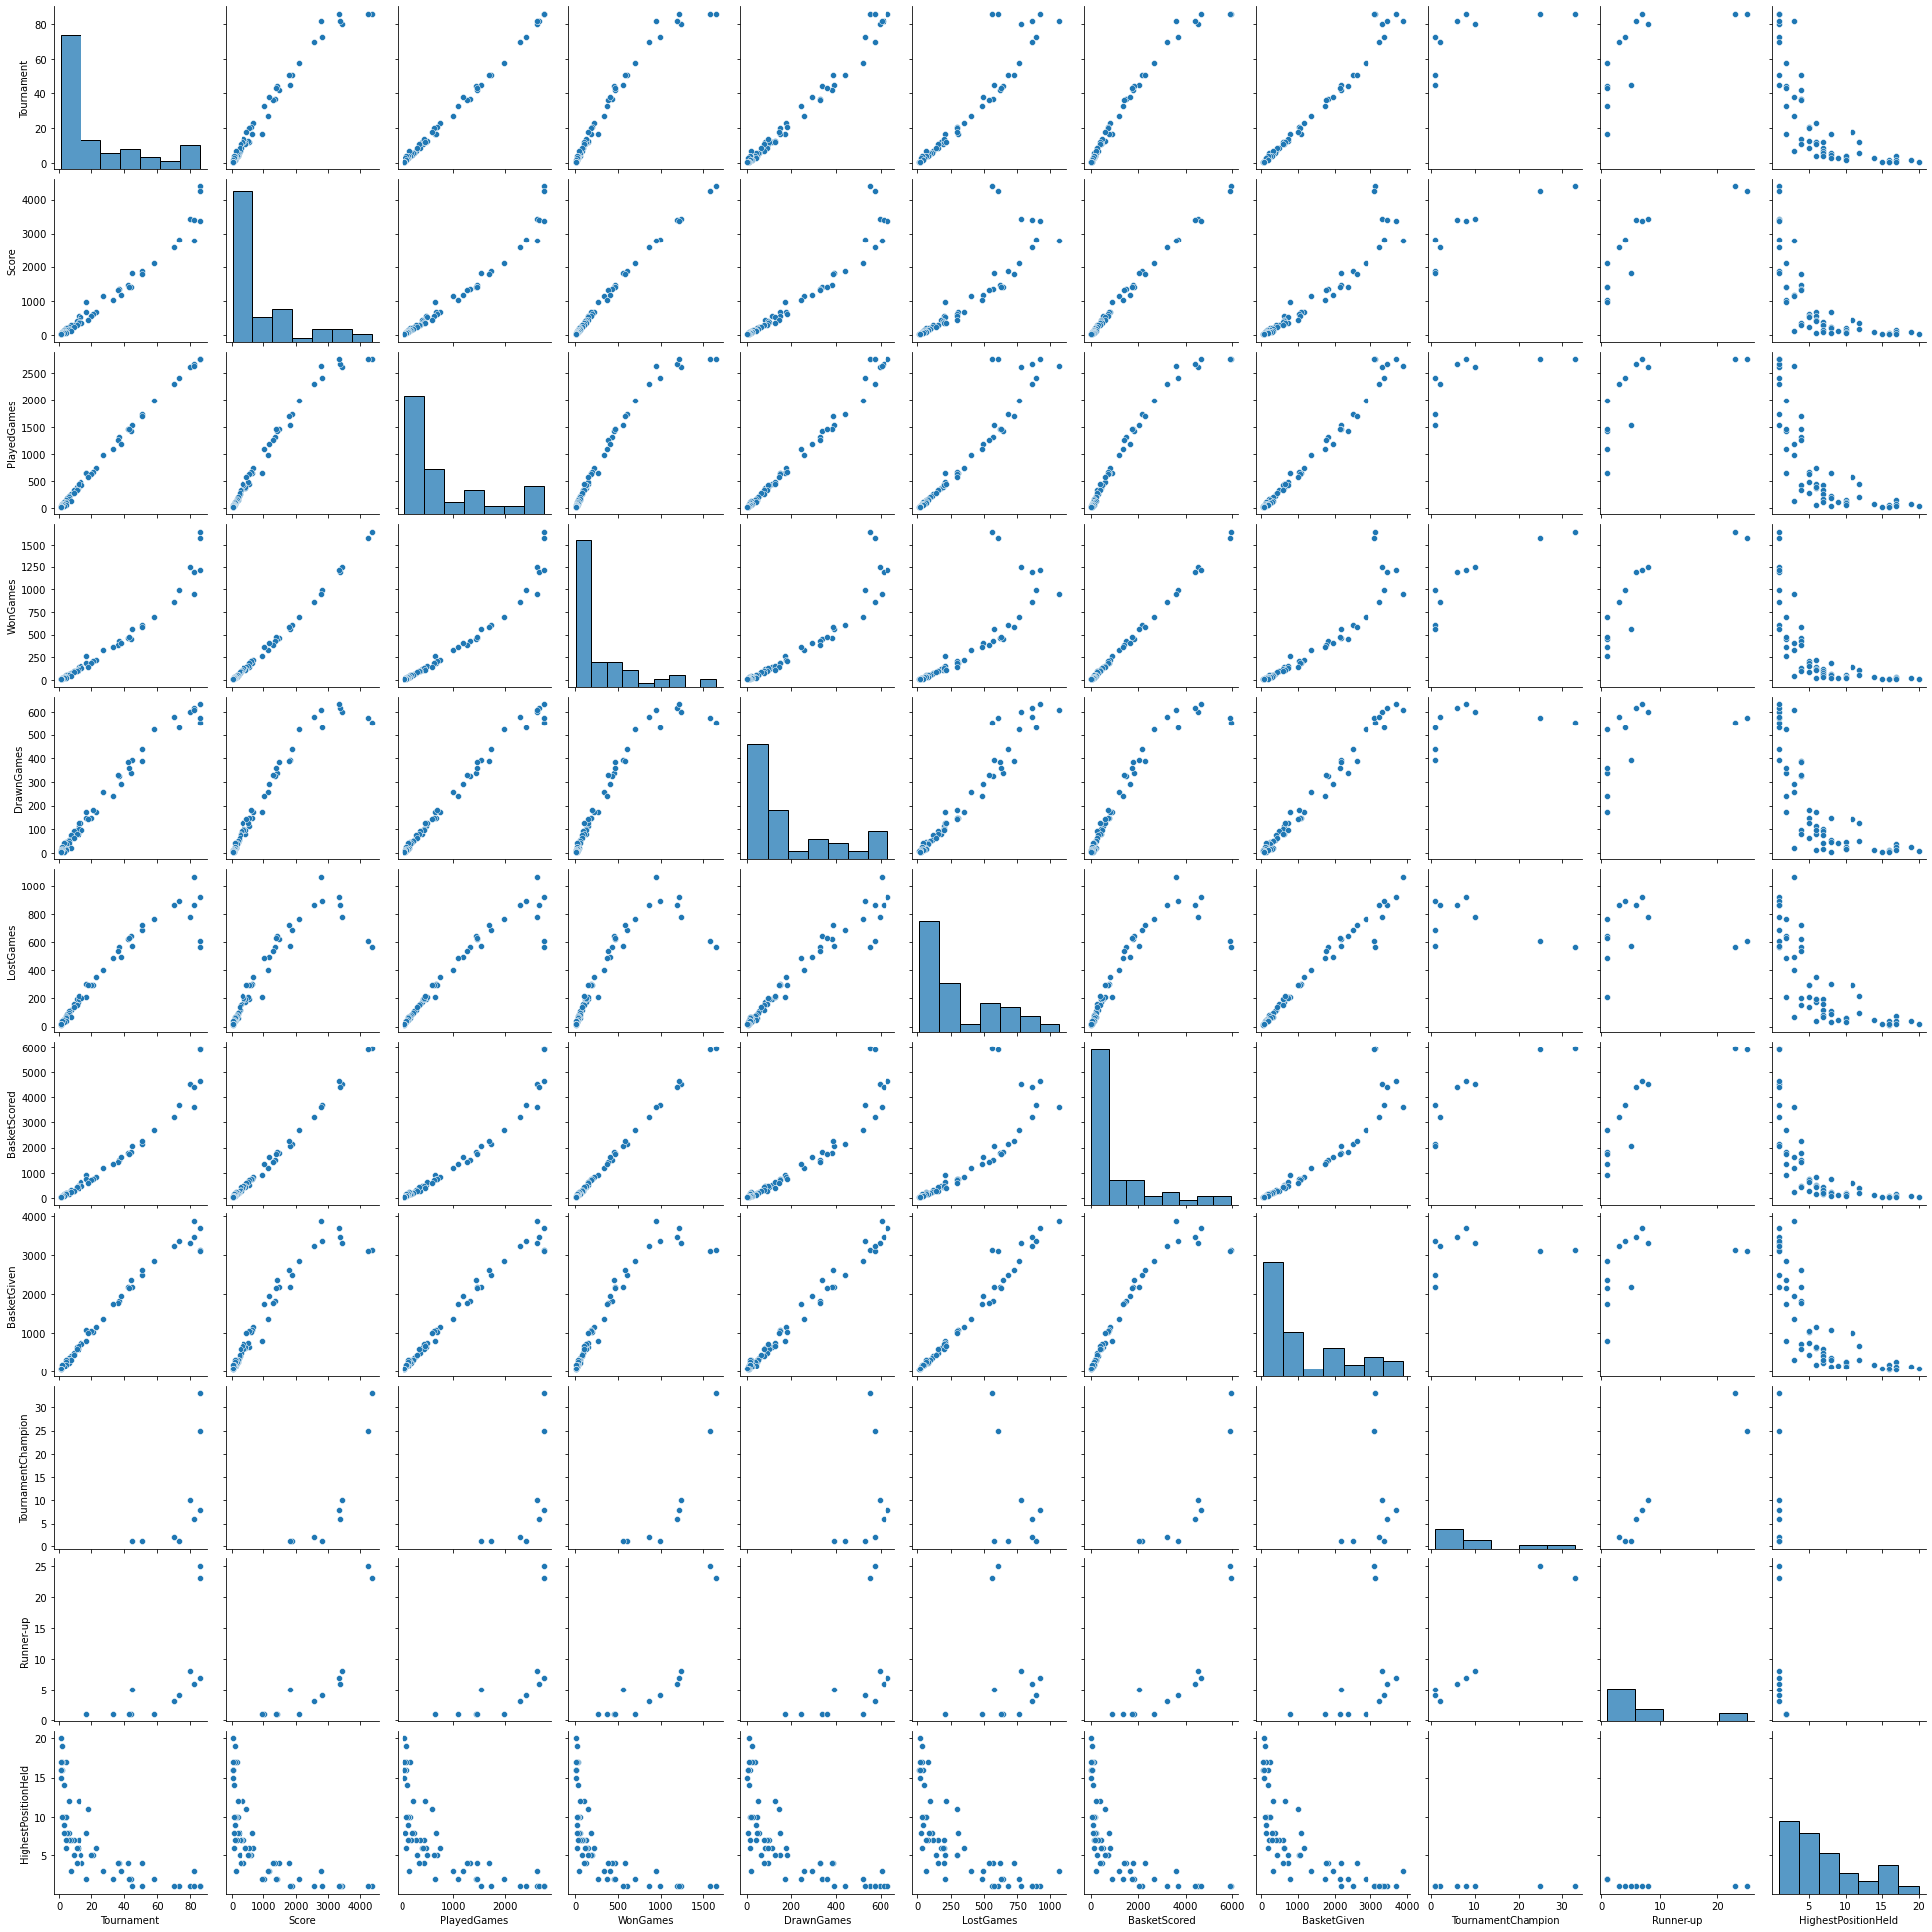

In [18]:
fdata_attr = fdata.iloc[:, 0:13]
sns.pairplot(fdata_attr, diag_kind='hist')

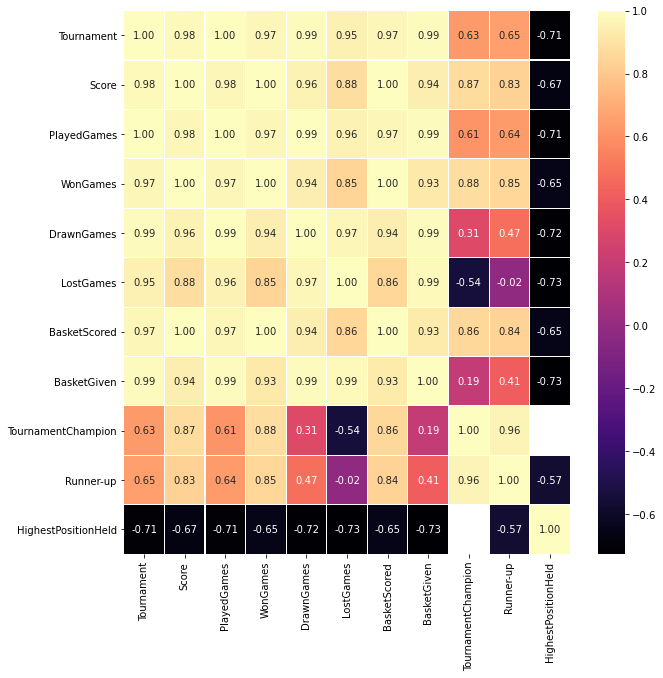

In [19]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(fdata.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

C:\Users\tusso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tournament', ylabel='Score'>

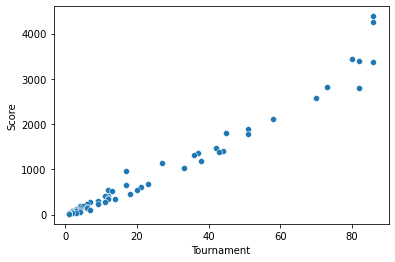

In [20]:
sns.scatterplot(fdata['Tournament'], fdata['Score'])

C:\Users\tusso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PlayedGames', ylabel='Score'>

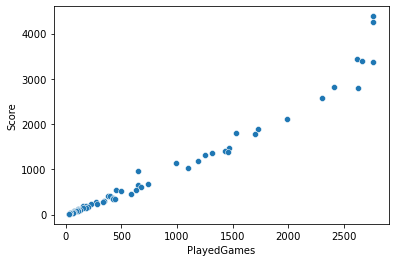

In [83]:
sns.scatterplot(fdata['PlayedGames'], fdata['Score'])

C:\Users\tusso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PlayedGames', ylabel='WonGames'>

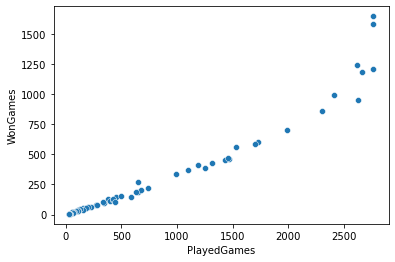

In [82]:
sns.scatterplot(fdata['PlayedGames'], fdata['WonGames'])

C:\Users\tusso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PlayedGames', ylabel='DrawnGames'>

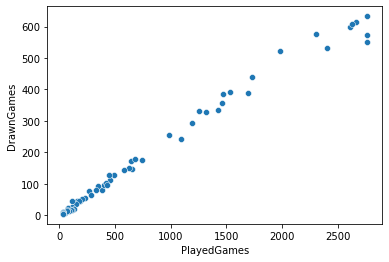

In [80]:
sns.scatterplot(fdata['PlayedGames'], fdata['DrawnGames'])

C:\Users\tusso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LostGames', ylabel='PlayedGames'>

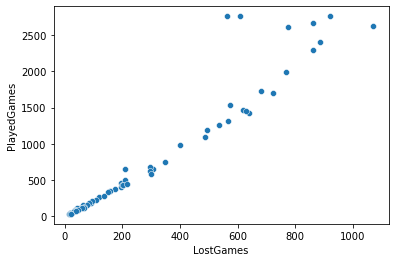

In [79]:
sns.scatterplot(fdata['LostGames'], fdata['PlayedGames'])

In [21]:
# metric scaled by 10000 to be able to visualize properly
metric=10000*(((fdata["WonGames"]+fdata["DrawnGames"]-fdata["LostGames"])/(fdata["PlayedGames"]))/fdata["Tournament"])

In [22]:
# Adding the Column named Metric with the performance data calculated in the above cell.
fdata = pd.concat([fdata, metric.rename("Metric")], axis=1)

In [23]:
# General Check for the added column.
fdata.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Metric
0,Team 1,86.0,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,1929,1.0,68.874931
1,Team 2,86.0,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,1929,1.0,65.085967
2,Team 3,80.0,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,10.0,8.0,1929,1.0,50.879878
3,Team 4,82.0,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,6.0,6.0,1931to32,1.0,43.122391
4,Team 5,86.0,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,8.0,7.0,1929,1.0,38.815823


In [24]:
# Filtering the data above an adequate value of Metric.
fdata[fdata["Metric"] > 113]      # For Metric >= 113; Chosen such that it encompases much younger teams with relatively good performance which the company requires.

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Metric
20,Team 21,17.0,970.0,646.0,266.0,172.0,208.0,892.0,789.0,NaN,1.0,1998-99,2.0,209.433619
24,Team 25,12.0,553.0,456.0,147.0,112.0,197.0,520.0,633.0,NaN,NaN,2004to05,6.0,113.304094
35,Team 36,7.0,277.0,270.0,76.0,76.0,118.0,320.0,410.0,NaN,NaN,1991_92,7.0,179.894180
38,Team 39,4.0,190.0,160.0,52.0,45.0,63.0,199.0,241.0,NaN,NaN,1994-95,10.0,531.250000
40,Team 41,6.0,168.0,204.0,59.0,50.0,95.0,216.0,310.0,NaN,NaN,1971-72,12.0,114.379085
41,Team 42,6.0,150.0,180.0,53.0,44.0,83.0,165.0,221.0,NaN,NaN,1963-64,7.0,129.629630
43,Team 44,3.0,132.0,114.0,35.0,27.0,52.0,139.0,167.0,NaN,NaN,2014-15,10.0,292.397661
45,Team 46,3.0,96.0,114.0,26.0,44.0,44.0,101.0,139.0,NaN,NaN,1990-91,9.0,760.233918
47,Team 48,2.0,83.0,80.0,20.0,23.0,37.0,62.0,117.0,NaN,NaN,1996-97,17.0,375.000000
48,Team 49,2.0,81.0,80.0,19.0,24.0,37.0,70.0,115.0,NaN,NaN,1995-96,19.0,375.000000


### The best performing teams are Team 21, Team 25, Team 36, Team 39, Team 44, Team 46, Team 48 & Team 49.

The Company must approach the above named teams since the older teams (Team 41, Team 42 & Team 53 much older than the 90s) might already be in contract with the competitors so the recommended teams to choose among the data set must be **the above named in bold letters**. It is likely that these teams might not have some ongoing contract since they are comparatively younger teams than those started much earlier than in the 90's according to the given data.

The odds of **Team 21** to achieve a significant status in the future is more than the other teams since it has shown good performance and has been a **runner up one time** and even after being comparably a younger team with lesser number of played games and tournaments it has shown significant promise. So, from the analysis the performance measuring metric is trying to tell us that we must go with the above mentioned teams.

**Note**: **Team 48 and Team 49** have held the lower positions of 17th and 19th respectivley. So the suggestion would be to not go with them. We would still be left with six other options that are in the top 10 ranks/highest_position_held.

### Improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the data points collected by the association to perform a better data analysis in future will be that they should try to focus more on the data blanks they had left as "-" and it would be much better if we we had much more data than we did in terms of position of the team in each game which would have had made a lot of difference. 

# Part Three | Project Based

1. Data warehouse:
• Read the CSV file.

In [2]:
df=pd.read_csv('DS - Part3 - CompanyX_EU.csv')

2. Data exploration:
• Check the datatypes of each attribute.
• Check for null values in the attributes.

In [3]:
df.info()        # To check the datatypes of each attribute.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


In [4]:
df.isnull().sum()        # To check for null values in the attributes.

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

3. Data preprocessing & visualisation:
• Drop the null values.
• Convert the ‘Funding’ features to a numerical value.
• Plot box plot for funds in million.
• Get the lower fence from the box plot.
• Check number of outliers greater than upper fence.
• Drop the values that are greater than upper fence.
• Plot the box plot after dropping the values.
• Check frequency of the OperatingState features classes.
• Plot a distribution plot for Funds in million.
• Plot distribution plots for companies still operating and companies that closed.

In [5]:
df = df.dropna()       # To drop the null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 1 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         446 non-null    object
 1   Product         446 non-null    object
 2   Funding         446 non-null    object
 3   Event           446 non-null    object
 4   Result          446 non-null    object
 5   OperatingState  446 non-null    object
dtypes: object(6)
memory usage: 24.4+ KB


In [7]:
df['Funding'] = df['Funding'].str.replace('$','')       # Get rid of $ sign first.
df.head()

# In the next cell we convert the 'Funding' features to a numerical value

<ipython-input-7-5b45937d1e41>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Funding'] = df['Funding'].str.replace('$','')       # Get rid of $ sign first.


,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,630K,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,1M,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,29M,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,1.8M,Hardware Battlefield 2014,Contestant,Operating


In [8]:

df.Funding = (df.Funding.replace(r'[KMB]+$', '', regex=True).astype(float) * \
   ....:           df.Funding.str.extract(r'[\d\.]+([KMB]+)', expand=False)
   ....:             .fillna(1)
   ....:             .replace(['K','M','B'], [10**3, 10**6, 10**9]).astype(int))

In [9]:
df.head()

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,630000.0,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,1000000.0,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,19300000.0,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,29000000.0,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,1800000.0,Hardware Battlefield 2014,Contestant,Operating


<AxesSubplot:xlabel='Funding'>

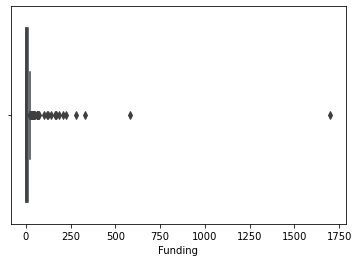

In [10]:
sns.boxplot(x=df['Funding']/(10**6))      # Box Plot for funds in million.

In [11]:
# Lower Fence validation from the graph.
df["Funding"].quantile(0.25)-1.5*(df["Funding"].quantile(0.75)-df["Funding"].quantile(0.25))  # Lower Fence is to the left of zero from the graph and we checked it through code. This value in minus is a bit weird.

-12349375.0

In [13]:
# Checking for number of outliers greater than upper fence.

# Upper Fence Calculated as 'z'.
z=df["Funding"].quantile(0.75)+1.5*(df["Funding"].quantile(0.75)-df["Funding"].quantile(0.25))


df[df["Funding"] > z].count()

Startup           60
Product           60
Funding           60
Event             60
Result            60
OperatingState    60
dtype: int64

**The number of outliers greater than the upper fence = 60** (Calculated above)

In [14]:
# Dropped the values that are greater than upper fence.
update_df = df[~(df["Funding"] > z)]

<AxesSubplot:xlabel='Funding'>

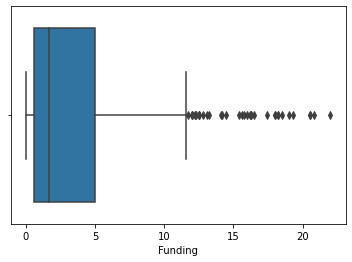

In [15]:
sns.boxplot(x=update_df['Funding']/(10**6))      # Box Plot for funds in million after dropping the values greater than upper fence.

In [16]:
# Checking the frequency of the OperatingState features classes.
update_df["OperatingState"].value_counts()

Operating    275
Closed        56
Acquired      55
Name: OperatingState, dtype: int64

C:\Users\tusso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Funding', ylabel='Density'>

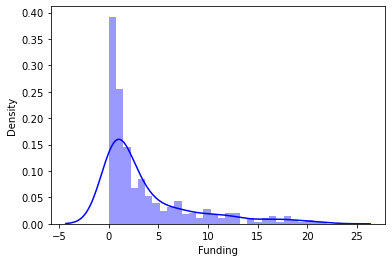

In [17]:
# Plotting a distribution plot for Funds in million.
sns.distplot(update_df['Funding']/(10**6), kde = True, color ='blue', bins = 30)

C:\Users\tusso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OperatingState', ylabel='Density'>

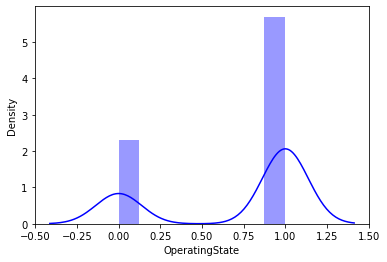

In [18]:
# Plot distribution plots for companies still operating and companies that closed.
sns.distplot(update_df['OperatingState']=="Operating", kde = True, color ='blue', bins = 8)    # Still Operating Companies

C:\Users\tusso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OperatingState', ylabel='Density'>

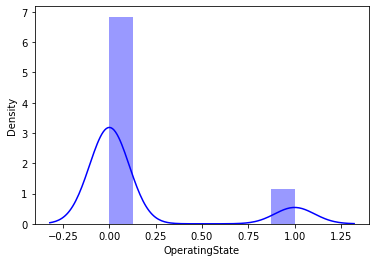

In [19]:
sns.distplot(update_df['OperatingState']=="Closed", kde = True, color ='blue', bins = 8)    # Closed Companies

<AxesSubplot:xlabel='Funding', ylabel='Count'>

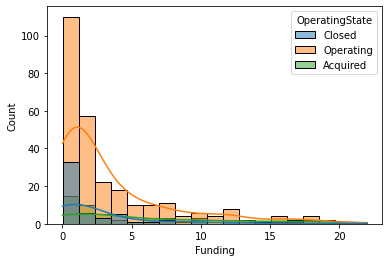

In [20]:
plt.figure(figsize = (25,15))  # setting the figure size 
sns.histplot(x = update_df["Funding"]/(10**6), kde = True, hue = update_df['OperatingState'])

4. Statistical analysis:
• Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?
Write the null hypothesis and alternative hypothesis.
Test for significance and conclusion
• Make a copy of the original data frame.
• Check frequency distribution of Result variable.
• Calculate percentage of winners that are still operating and percentage of contestants that are still operating
• Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:
Write the null hypothesis and alternative hypothesis.
Test for significance and conclusion
• Check distribution of the Event variable.
• Select only the Event that has disrupt keyword from 2013 onwards.
• Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from
2013 onwards.
• Plot the distribution plot comparing the 3 city events.

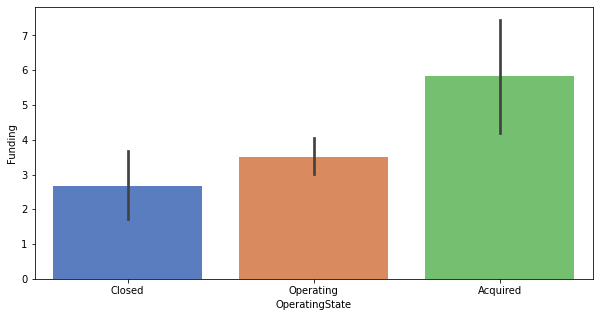

In [21]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x=update_df['OperatingState'], y=update_df["Funding"]/(10**6), data=update_df, palette='muted')  # barplot

<AxesSubplot:xlabel='OperatingState', ylabel='Funding'>

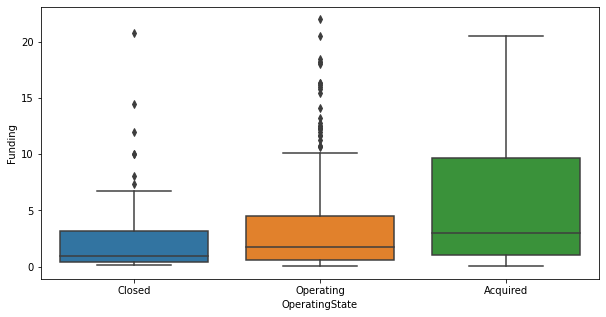

In [124]:
plt.figure(figsize = (10,5))  # setting the figure size
sns.boxplot(y = update_df['Funding']/(10**6), x=update_df['OperatingState'])

### No, there is not much significant difference between Funds raised by companies that are still operating vs companies that closed down, which can be inferred from the above graph.

### Write the null hypothesis and alternative hypothesis.

**Null Hypothesis: There is a significant difference between Funds raised by companies that are still operating vs companies that closed down**

**Alternative Hypothesis: No significant difference between Funds raised by companies that are still operating vs companies that closed down**

### Test for significance and conclusion.

The graph above is itself an evidently conclusive test which suggests that we have enough evidence to reject the null hypothesis and hence the alternative hypothesis will hold true for the given amount of data.

In [22]:
# Making a copy of the original data frame.
odf=pd.read_csv('DS - Part3 - CompanyX_EU.csv')
df_copy=odf.copy()

<AxesSubplot:xlabel='Result', ylabel='Count'>

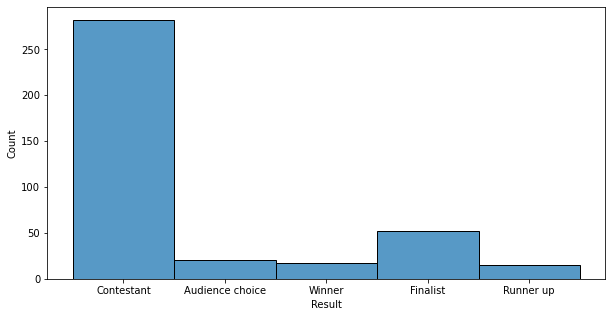

In [23]:
# Check frequency distribution of Result variable.
plt.figure(figsize=(10,5))  # setting the figure size
sns.histplot(x = update_df["Result"])

In [24]:
winner=df[df["Result"] == "Winner"]
contestant=df[df["Result"] == "Contestant"]
operating=df[df["OperatingState"] == "Operating"]

In [61]:
wso=pd.DataFrame(np.intersect1d(winner.index, operating.index)).count().iat[0]        # No. of Winners Still Operating
cso=pd.DataFrame(np.intersect1d(contestant.index, operating.index)).count().iat[0]    # No. of Contestants Still Operating
wincount = winner.count().iat[0]                  # No. of Winners        
concount = contestant.count().iat[0]              # No. of Contestants

In [62]:
# Calculate percentage of winners that are still operating and percentage of contestants that are still operating.
print("Percentage of winners that are still operating = "+str(wso/wincount*100))
print("Percentage of contestants that are still operating = "+str(cso/concount*100))

Percentage of winners that are still operating = 72.0
Percentage of contestants that are still operating = 68.58974358974359


In [ ]:
#Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:
#Write the null hypothesis and alternative hypothesis.
#Test for significance and conclusion.

**Null Hypothesis:** The companies that won the contest are more likely to be in a state of Operation compared to the companies that merely participated in it.

**Alternative Hypothesis:** The companies that won the contest might not necessarily win in the real world and stay operational compared to the companies that merely participated in it.

The significance and conclusion of the above calculations are that it is the winners that have a slightly larger chance to remain operable but it is evident that the contestants who participated are doing much better than they should be doing compared to the winners as they are still operable and the count is not too away from the winners which brings me to the question whether the contestants really were evaluated to a better simulation of the real world situation or was it just another exam that measures ones ability at a particular time for a particular set of rules which need not apply in the real world.

<AxesSubplot:xlabel='Count', ylabel='Event'>

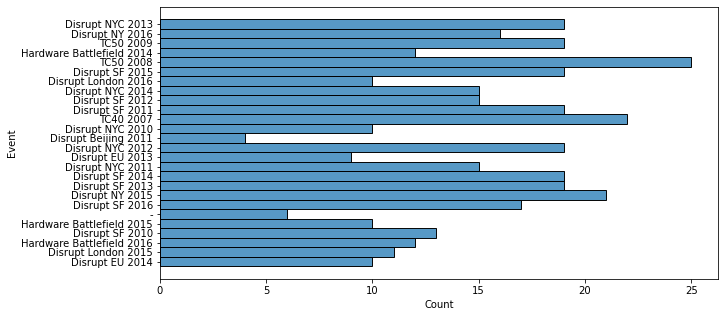

In [123]:
# Check distribution of the Event variable.
plt.figure(figsize=(10,5))  # setting the figure size
sns.histplot(y = update_df["Event"])

In [114]:
dis = update_df[update_df.Event.str.contains("Disrupt",case=False)] # Extracting rows with string "Disrupt" under the column "Event".
a13 = update_df[update_df.Event.str.contains("2013",case=False)]    # Extracting rows with string "2013" under the column "Event".
a14 = update_df[update_df.Event.str.contains("2014",case=False)]    # Extracting rows with string "2014" under the column "Event".
a15 = update_df[update_df.Event.str.contains("2015",case=False)]    # Extracting rows with string "2015" under the column "Event".
a16 = update_df[update_df.Event.str.contains("2016",case=False)]    # Extracting rows with string "2016" under the column "Event".
dis13index = np.intersect1d(dis.index, a13.index)       # Taking the intersection of numpy arrays with indices of the above extracted rows that contain the strings "Disrupt" & "2013".
dis14index = np.intersect1d(dis.index, a14.index)       # Taking the intersection of numpy arrays with indices of the above extracted rows that contain the strings "Disrupt" & "2014".
dis15index = np.intersect1d(dis.index, a15.index)       # Taking the intersection of numpy arrays with indices of the above extracted rows that contain the strings "Disrupt" & "2015".
dis16index = np.intersect1d(dis.index, a16.index)       # Taking the intersection of numpy arrays with indices of the above extracted rows that contain the strings "Disrupt" & "2016".
d34 = np.union1d(dis13index, dis14index)          # Combining the list of indices containing the strings "Disrupt", "2013" & "2014".
d56 = np.union1d(dis15index, dis16index)          # Combining the list of indices containing the strings "Disrupt", "2015" & "2016".
disabove13 = np.union1d(d34, d56)                 # Combining the list of indices containing the strings "Disrupt", "2013", "2014", "2015" & "2016".

In [115]:
#Select only the Event that has disrupt keyword from 2013 onwards.
disrupt = update_df.loc[disabove13]
print(disrupt)

        Startup         Product     Funding                Event  \
1          3DLT        3dlt.com    630000.0     Disrupt NYC 2013   
3    3Dprintler  3dprintler.com   1000000.0      Disrupt NY 2016   
13     Agrilyst    agrilyst.com   1000000.0      Disrupt SF 2015   
14        Aiden        aiden.ai    750000.0  Disrupt London 2016   
16      Aircall      aircall.io  11600000.0      Disrupt SF 2015   
..          ...             ...         ...                  ...   
635   Welltwigs   welltwigs.com     50000.0      Disrupt NY 2015   
641    Workspot    workspot.com  15800000.0     Disrupt NYC 2013   
642       Xendo       xendo.com     28000.0      Disrupt SF 2014   
646  YayPay Inc      yaypay.com    900000.0  Disrupt London 2015   
660        Zula     zulaapp.com   3400000.0      Disrupt SF 2013   

              Result OperatingState  
1         Contestant         Closed  
3    Audience choice      Operating  
13            Winner      Operating  
14        Contestant      Opera

In [137]:
dNY = disrupt[disrupt.Event.str.contains("NY",case=False)]      # Extracting rows with string "NY" or "NYC" under the column "Event".
dSF = disrupt[disrupt.Event.str.contains("SF",case=False)]      # Extracting rows with string "SF" under the column "Event".
dEU = disrupt[disrupt.Event.str.contains("EU",case=False)]      # Extracting rows with string "EU" under the column "Event".

In [135]:
dNYSFindex = np.union1d(dNY.index, dSF.index)      # Combining the list of indices containing the strings "NY" & "SF".
d3index = np.union1d(dNYSFindex, dEU.index)        # Combining the list of indices containing the strings "NY", "SF" & "EU".
d3cities = disrupt.loc[d3index]                    # DataFrame containing only the rows having the strings "NY", "SF" & "EU"  under the column "Event".

### Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 2013 onwards.

**Null Hypothesis**: Volume of funds raised across cities must be independent of the place in which the event was held.

**Alternative Hypothesis**: Volume of funds raised across cities must be dependent on the place in which the event was held.

We reject the null hypotheis since the net volume of funds raised is dependent on the place in which the event was held. From the box plots below we arrive at the conclusion that the interquartile range of different box plots for different cities was on an average not equal in width which implies that even if we ignore the outliers and whiskers the middle data is itself different for different plots. This boxes the data generates significantly shouts about the difference in funds raised for different cities. Thus we reject the null hypothesis and need to go with the alternative hypothesis.

In [144]:
# Comparision of the funds raised by companies across NY, SF and EU events from 2013 onwards.
print("Description of the range of funds raised by companies across NY :\n" + str(dNY["Funding"].describe()) + "\n")
print("Description of the range of funds raised by companies across SF :\n" + str(dSF["Funding"].describe()) + "\n")
print("Description of the range of funds raised by companies across EU :\n" + str(dEU["Funding"].describe()) + "\n")

Description of the range of funds raised by companies across NY :
count    7.100000e+01
mean     3.605079e+06
std      4.640688e+06
min      2.000000e+04
25%      5.100000e+05
50%      1.600000e+06
75%      5.900000e+06
max      2.200000e+07
Name: Funding, dtype: float64

Description of the range of funds raised by companies across SF :
count    7.400000e+01
mean     2.962930e+06
std      3.505991e+06
min      2.000000e+04
25%      5.250000e+05
50%      1.600000e+06
75%      3.275000e+06
max      1.250000e+07
Name: Funding, dtype: float64

Description of the range of funds raised by companies across EU :
count    1.900000e+01
mean     3.559732e+06
std      4.885227e+06
min      2.750000e+05
25%      4.557500e+05
50%      1.100000e+06
75%      6.050000e+06
max      1.820000e+07
Name: Funding, dtype: float64



<AxesSubplot:xlabel='Event', ylabel='Funding'>

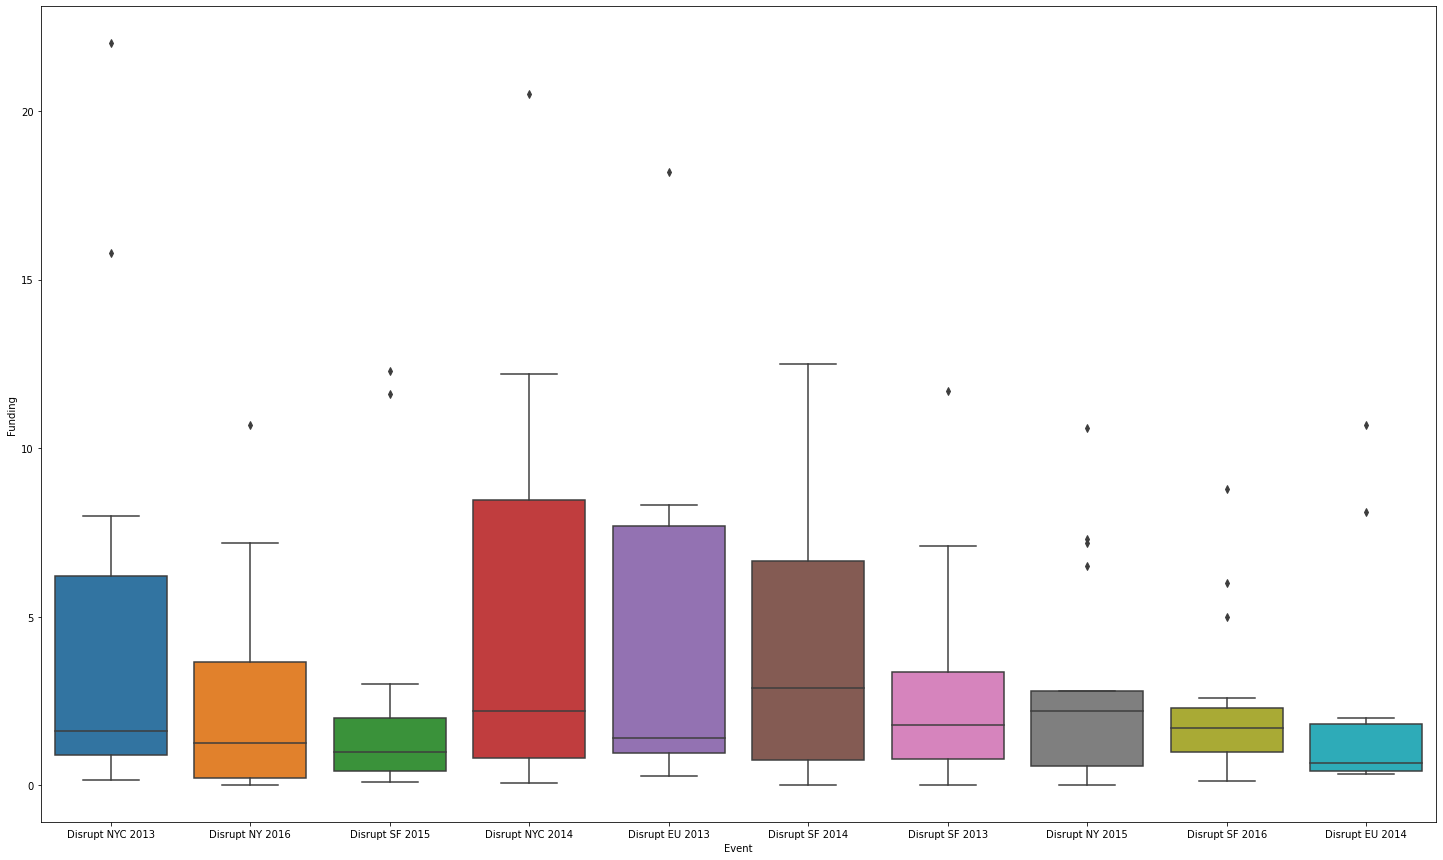

In [138]:
# Visualizing the funds raised by companies across NY, SF and EU events from 2013 onwards.
plt.figure(figsize = (25,15))  # setting the figure size
sns.boxplot(y = d3cities['Funding']/(10**6), x = d3cities["Event"])

<AxesSubplot:xlabel='Event', ylabel='Count'>

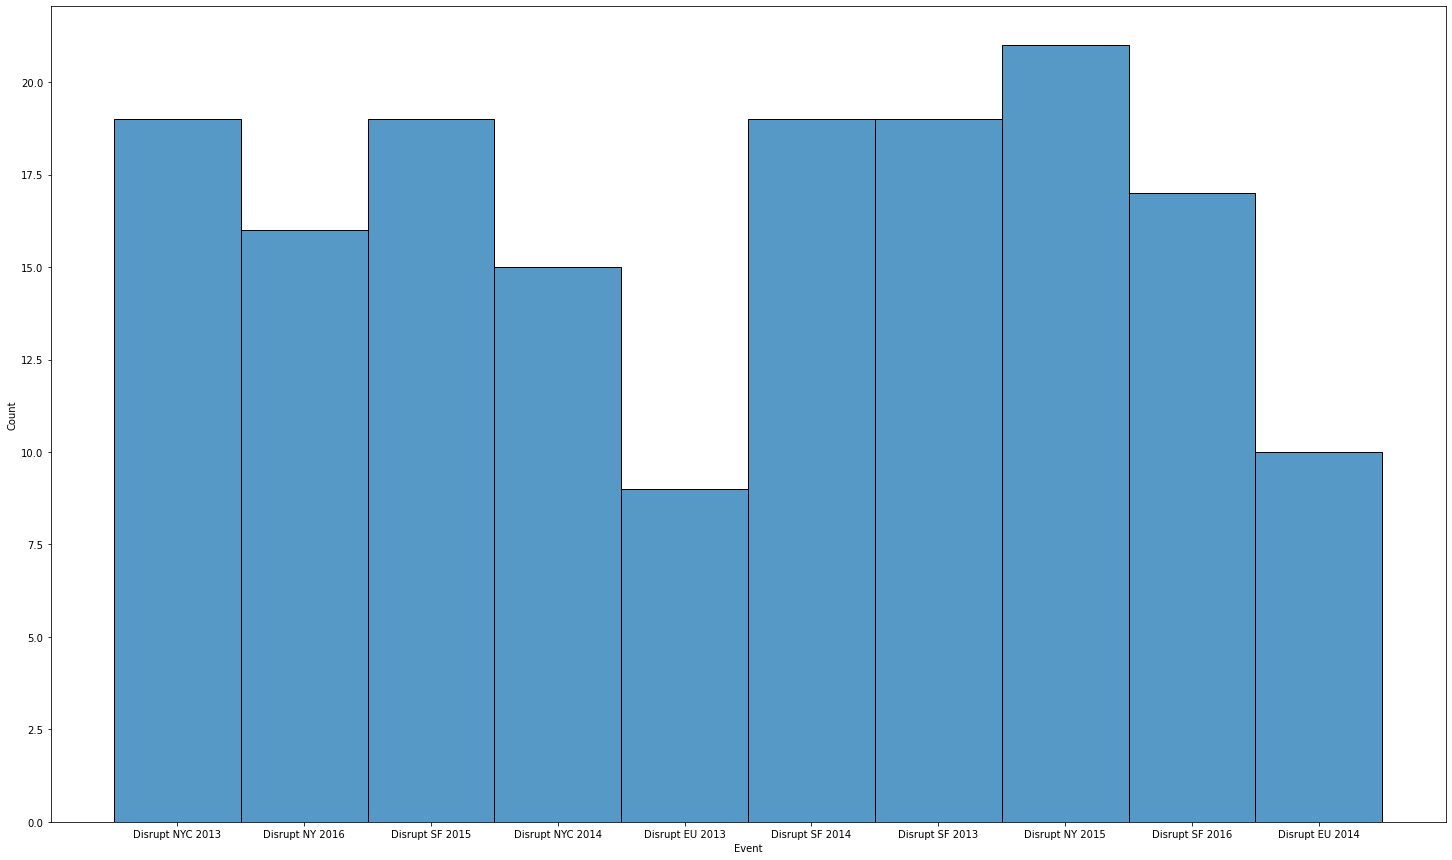

In [133]:
# Plot the distribution plot comparing the 3 city events.
plt.figure(figsize = (25,15))  # setting the figure size
sns.histplot(x = d3cities["Event"])

5. Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform a better data analysis.

The quality of the given data needs improvement such as, there were a significant number of rows that were needed to be dropped and the analyzation was done on the rest of the data which would have gotten better if we had all those blanks filled.

Also there is a need for the data generating team to be guided properly in order to maintain separate columns for values like Event and Year which was time consuming for me to do my job. As an organization the different parts of it must go in sync so that the overall efficiency of people delivering more work in a given time increases which happens only when one goes behind small details that leads to perfection at the tiniest scales. The generated data must be in such a condition which consumes the least amount of time in going through the preprocessing process and only needs to be checked and rarely corrected. I think this is how big giants like Apple, Inc. work. Even the wiring of an Apple computer in the early stages of the company used to be geometrical which allowed them to fit those connections within some inches or so today and this feat was only achieved because of the constant pursuit of perfection which they tend to do from time to time.